In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import statsmodels.api as s

In [5]:
tb1=pd.read_excel('C:/Users/Mahendran/Downloads/nptel-DA/dummy.xlsx')
tb1

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours
0,1,2,electrical,2.9
1,2,6,mechanical,3.0
2,3,8,electrical,4.8
3,4,3,mechanical,1.8
4,5,2,electrical,2.9
5,6,7,electrical,4.9
6,7,9,mechanical,4.2
7,8,8,mechanical,4.8
8,9,4,electrical,4.4
9,10,6,electrical,4.5


Text(0.5, 1.0, 'simple linear regression')

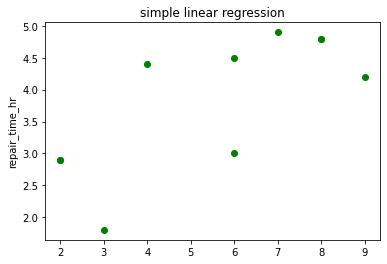

In [8]:
plt.scatter(tb1['months_since_last_service'],tb1['repair_time_in_hours'],color='g')
plt.ylabel('repair_time_hr')
plt.title('simple linear regression')

In [11]:
Reg=sm.ols(formula='repair_time_in_hours ~ months_since_last_service',data=tb1)
Fit1=Reg.fit()
Fit1.summary()

C:\Users\Mahendran\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     repair_time_in_hours   R-squared:                       0.534
Model:                              OLS   Adj. R-squared:                  0.476
Method:                   Least Squares   F-statistic:                     9.174
Date:                  Wed, 30 Mar 2022   Prob (F-statistic):             0.0163
Time:                          17:56:44   Log-Likelihood:                -10.602
No. Observations:                    10   AIC:                             25.20
Df Residuals:                         8   BIC:                             25.81
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     2.1473      0.605      3.549      0.008       0.752       3.542
months_since_last_service     0.3041      0.100      3.029      0.016       0.073       0.536
==============================================================================
Omnibus:                        0.907   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.751
Skew:                          -0.501   Prob(JB):                        0.687
Kurtosis:                       2.107   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

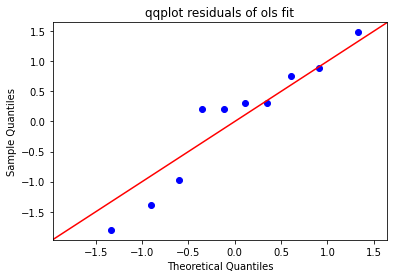

In [18]:
res=Fit1.resid
probplot=s.ProbPlot(res,stats.norm,fit=True)
fig=probplot.qqplot(line='45')
plt.title('qqplot residuals of ols fit')
plt.show()

In [20]:
just_dummies=pd.get_dummies(tb1['type_of_repair'])
just_dummies

,electrical,mechanical
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [24]:
step_1=pd.concat([tb1,just_dummies],axis=1)
step_1.drop(['type_of_repair','mechanical'],inplace=True,axis=1)
step_1

,servicecall,months_since_last_service,repair_time_in_hours,electrical
0,1,2,2.9,1
1,2,6,3.0,0
2,3,8,4.8,1
3,4,3,1.8,0
4,5,2,2.9,1
5,6,7,4.9,1
6,7,9,4.2,0
7,8,8,4.8,0
8,9,4,4.4,1
9,10,6,4.5,1


In [31]:
result=(s.OLS(step_1['repair_time_in_hours'],s.add_constant(step_1[['months_since_last_service','electrical']]))).fit()
result.summary()

C:\Users\Mahendran\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     repair_time_in_hours   R-squared:                       0.859
Model:                              OLS   Adj. R-squared:                  0.819
Method:                   Least Squares   F-statistic:                     21.36
Date:                  Wed, 30 Mar 2022   Prob (F-statistic):            0.00105
Time:                          18:32:25   Log-Likelihood:                -4.6200
No. Observations:                    10   AIC:                             15.24
Df Residuals:                         7   BIC:                             16.15
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.9305      0.467      1.993      0.087      -0.174       2.035
months_since_last_service     0.3876      0.063      6.195      0.000       0.240       0.536
electrical                    1.2627      0.314      4.020      0.005       0.520       2.005
==============================================================================
Omnibus:                        3.357   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                1.663
Skew:                           0.994   Prob(JB):                        0.435
Kurtosis:                       2.795   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
result1=sm.ols(formula='repair_time_in_hours~months_since_last_service+electrical',data=step_1).fit()
result1.summary()

C:\Users\Mahendran\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     repair_time_in_hours   R-squared:                       0.859
Model:                              OLS   Adj. R-squared:                  0.819
Method:                   Least Squares   F-statistic:                     21.36
Date:                  Wed, 30 Mar 2022   Prob (F-statistic):            0.00105
Time:                          18:40:10   Log-Likelihood:                -4.6200
No. Observations:                    10   AIC:                             15.24
Df Residuals:                         7   BIC:                             16.15
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.9305      0.467      1.993      0.087      -0.174       2.035
months_since_last_service     0.3876      0.063      6.195      0.000       0.240       0.536
electrical                    1.2627      0.314      4.020      0.005       0.520       2.005
==============================================================================
Omnibus:                        3.357   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                1.663
Skew:                           0.994   Prob(JB):                        0.435
Kurtosis:                       2.795   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
tb2=pd.read_excel('C:/Users/Mahendran/Downloads/nptel-DA/dummy2.xlsx')
tb2

,Employee,Salary,Gender,Experience
0,1,7.5,Male,6
1,2,8.6,Male,10
2,3,9.1,Male,12
3,4,10.3,Male,18
4,5,13.0,Male,30
5,6,6.2,Female,5
6,7,8.7,Female,13
7,8,9.4,Female,15
8,9,9.8,Female,21


Text(0.5, 1.0, 'simple linear regression')

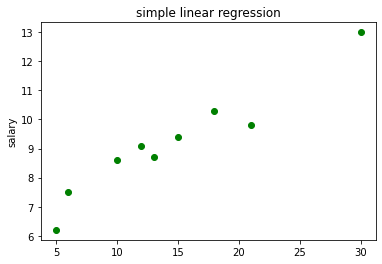

In [41]:
plt.scatter(tb2['Experience'],tb2['Salary'],color='g')
plt.ylabel('salary')
plt.title('simple linear regression')

In [45]:
res2=sm.ols(formula='Salary~Experience',data=tb2)
Fit2=res2.fit()
Fit2.summary()

C:\Users\Mahendran\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     87.61
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           3.30e-05
Time:                        19:14:24   Log-Likelihood:                -6.2491
No. Observations:                   9   AIC:                             16.50
Df Residuals:                       7   BIC:                             16.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8093      0.404     14.386      0.000       4.854       6.764
Experience     0.2332      0.025      9.360      0.000       0.174       0.292
==============================================================================
Omnibus:                        2.443   Durbin-Watson:                   1.171
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                1.432
Skew:                          -0.918   Prob(JB):                        0.489
Kurtosis:                       2.331   Cond. No.                         35.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

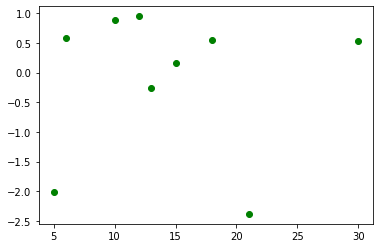

In [46]:
influence=Fit2.get_influence()
resid_student=influence.resid_studentized_external
plt.figure()
plt.scatter(tb2['Experience'],resid_student,color="g")

Text(0.5, 1.0, 'qqplot-residuals of ols fit')

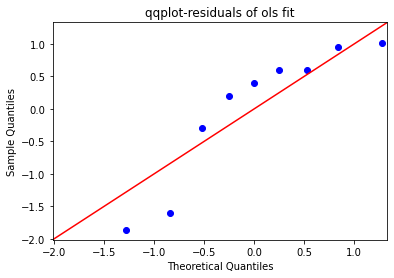

In [51]:
res=Fit2.resid
probplot=s.ProbPlot(res,stats.norm,fit=True)
fig=probplot.qqplot(line='45')
plt.title('qqplot-residuals of ols fit')
#plt.show()

In [54]:
just_dummies2=pd.get_dummies(tb2['Gender'])
just_dummies2

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0


In [59]:
step_2=pd.concat([tb2,just_dummies2],axis=1)
step_2.drop(['Gender','Male'],inplace=True,axis=1)
step_2

,Employee,Salary,Experience,Female
0,1,7.5,6,0
1,2,8.6,10,0
2,3,9.1,12,0
3,4,10.3,18,0
4,5,13.0,30,0
5,6,6.2,5,1
6,7,8.7,13,1
7,8,9.4,15,1
8,9,9.8,21,1


In [60]:
result2=s.OLS(step_2['Salary'],s.add_constant(step_2['Female'])).fit()
result2.summary()

C:\Users\Mahendran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Mahendran\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.8426
Date:                Wed, 30 Mar 2022   Prob (F-statistic):              0.389
Time:                        19:35:35   Log-Likelihood:                -17.455
No. Observations:                   9   AIC:                             38.91
Df Residuals:                       7   BIC:                             39.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7000      0.853     11.367      0.000       7.682      11.718
Female        -1.1750      1.280     -0.918      0.389      -4.202       1.852
==============================================================================
Omnibus:                        0.387   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.280
Skew:                           0.330   Prob(JB):                        0.869
Kurtosis:                       2.441   Cond. No.                         2.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
result2=s.OLS(step_2['Salary'],s.add_constant(step_2[['Female','Experience']])).fit()
result2.summary()

C:\Users\Mahendran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Mahendran\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     111.6
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           1.80e-05
Time:                        19:38:59   Log-Likelihood:                -1.5752
No. Observations:                   9   AIC:                             9.150
Df Residuals:                       6   BIC:                             9.742
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2485      0.291     21.439      0.000       5.535       6.962
Female        -0.7890      0.238     -3.309      0.016      -1.372      -0.206
Experience     0.2271      0.016     14.089      0.000       0.188       0.267
==============================================================================
Omnibus:                        0.110   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.947   Jarque-Bera (JB):                0.198
Skew:                           0.174   Prob(JB):                        0.906
Kurtosis:                       2.363   Cond. No.                         44.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""